<a href="https://colab.research.google.com/github/oleksandragolub/Progetto-Machine-Learning/blob/main/progetto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning**

---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — AA 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706) \
— Giovanni Bishara (869532) \
— Federico Brambilla (886046)

---
---

### **Librerie e strumenti per il preprocessing e la modellazione in ML**

Queste righe di codice importano le librerie necessarie per il preprocessing dei dati, la gestione dei dataset e la loro visualizzazione, oltre a strumenti per il bilanciamento dei dati e l'implementazione di modelli di machine learning:
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).

Modelli di Machine Learning:
- **DecisionTreeClassifier** implementa un albero di decisione, un modello che suddivide i dati in base a domande sequenziali per fare previsioni.
- **plot_tree** è una funzione che permette di visualizzare la struttura dell'albero di decisione addestrato. È utile per interpretare il modello, capire quali feature sono state utilizzate per le suddivisioni e come il modello prende le decisioni.
- **LogisticRegression** è un modello statistico di classificazione binaria basato sulla funzione logistica (sigmoide). Stima la probabilità che un'osservazione appartenga a una classe specifica.
- **SVC (Support Vector Classifier)** è un potente modello per la classificazione. Trova un iperpiano ottimale che separa le classi massimizzando la distanza tra loro. Può utilizzare diversi kernel (lineare, polinomiale, RBF, ecc).
- **GaussianNB (Naive Bayes Gaussiano)** è basato sul **Teorema di Bayes**, assume che le feature siano indipendenti tra loro. La variante GaussianNB è utilizzata quando le feature seguono una distribuzione normale (gaussiana). È molto veloce e adatto a dataset di grandi dimensioni.
- **RandomForestClassifier** è un modello ensemble che combina più alberi di decisione per migliorare l'accuratezza e ridurre l'overfitting. Ogni albero riceve un sottoinsieme casuale dei dati (bagging) e fa una previsione. Il risultato finale è dato dalla maggioranza delle previsioni degli alberi. È molto potente, flessibile e meno sensibile ai dati rumorosi.

Metriche di valutazione dei modelli:
- **accuracy_score(y_true, y_pred)** serve per calcolare l'accuratezza, ossia la percentuale di previsioni corrette.
- **precision_score(y_true, y_pred)** serve per indicare la percentuale di predizioni corrette tra quelle che il modello ha classificato come positive. Utile per problemi con classi sbilanciate.
- **recall_score(y_true, y_pred)** serve per misurare quanti dei veri positivi il modello è riuscito a identificare.
- **f1_score(y_true, y_pred)** serve per ottenere la media armonica tra precisione e recall. Utile quando è importante trovare un bilanciamento tra precisione e recall.
- **confusion_matrix(y_true, y_pred)** serve per creare una matrice di confusione, che mostra il numero di predizioni corrette e errate suddivise per classe. Utile per analizzare dove il modello sta sbagliando.

In [107]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

---
---

### **Dataset**
Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [108]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


---
---
### **Caratteristiche del dataset originale**
Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [109]:
df.shape

(768, 9)

*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.




In [110]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


CAPIRE SE SERVONO CAST VARI

Variabili

*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un oggetto di tipo DataFrame di Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: float64(2), int64(7)` indica che nel dataset ci sono 2 colonne con tipo float64 (numeri decimali) e 7 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 54.1 KB di memoria.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*  `df.describe()` mostra le statistiche principali di ogni feature numerica:
  - media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
  - aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [112]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [113]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
---

### **Comprensione del quadro generale e obiettivo**

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.

* Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che il dataset non è bilanciato, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.

In [114]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

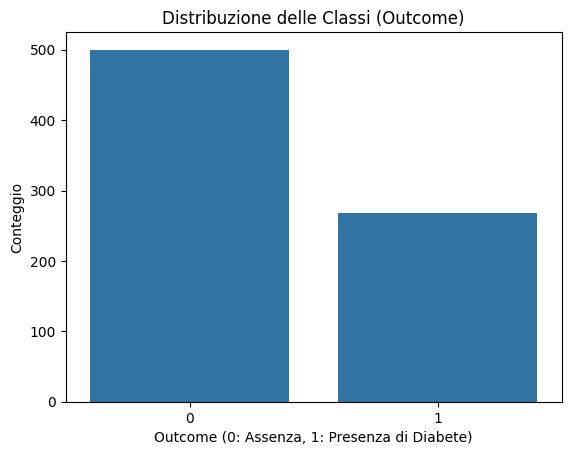

In [115]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribuzione delle Classi (Outcome)")
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")
plt.show()

Questo pezzo di codice genera istogrammi per visualizzare la distribuzione di tutte le variabili numeriche nel dataset, escludendo la colonna `Outcome`:
 - `df.drop(columns=["Outcome"])` crea un nuovo DataFrame temporaneo, escludendo la colonna `Outcome`, che è una variabile categoriale (0 e 1). Questo assicura che gli istogrammi vengano generati **solo per le feature continue**.
 - `.hist()` genera istogrammi per tutte le colonne numeriche rimanenti.

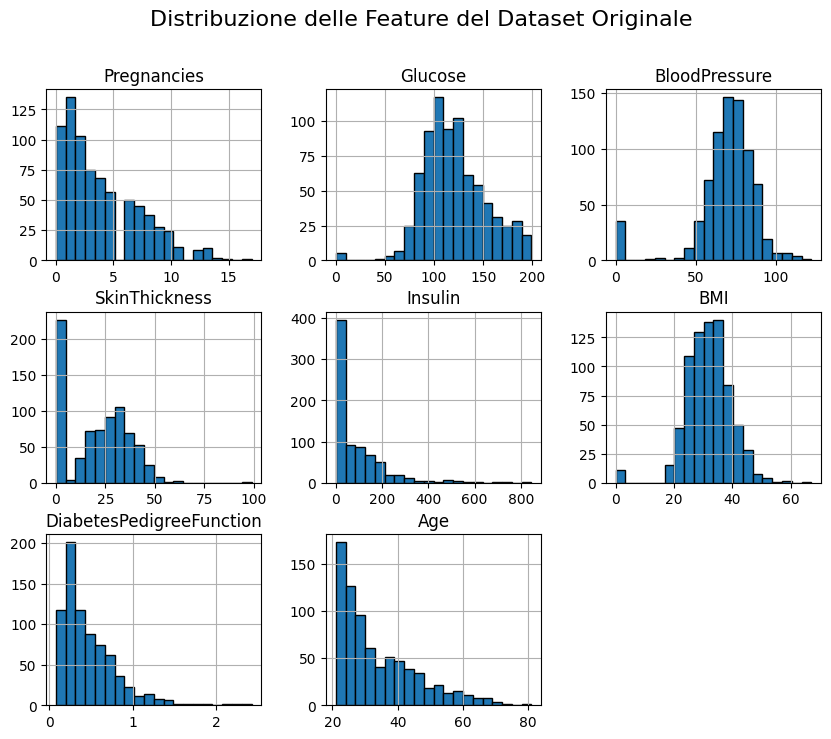

In [116]:
df.drop(columns=["Outcome"]).hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature del Dataset Originale', fontsize=16)
plt.show()

Questo pezzo di codice crea dei grafici di densità (KDE - Kernel Density Estimation) per ogni feature del dataset. I grafici mostrano la distribuzione probabilistica delle variabili, aiutando a visualizzare la forma dei dati e la loro variazione.

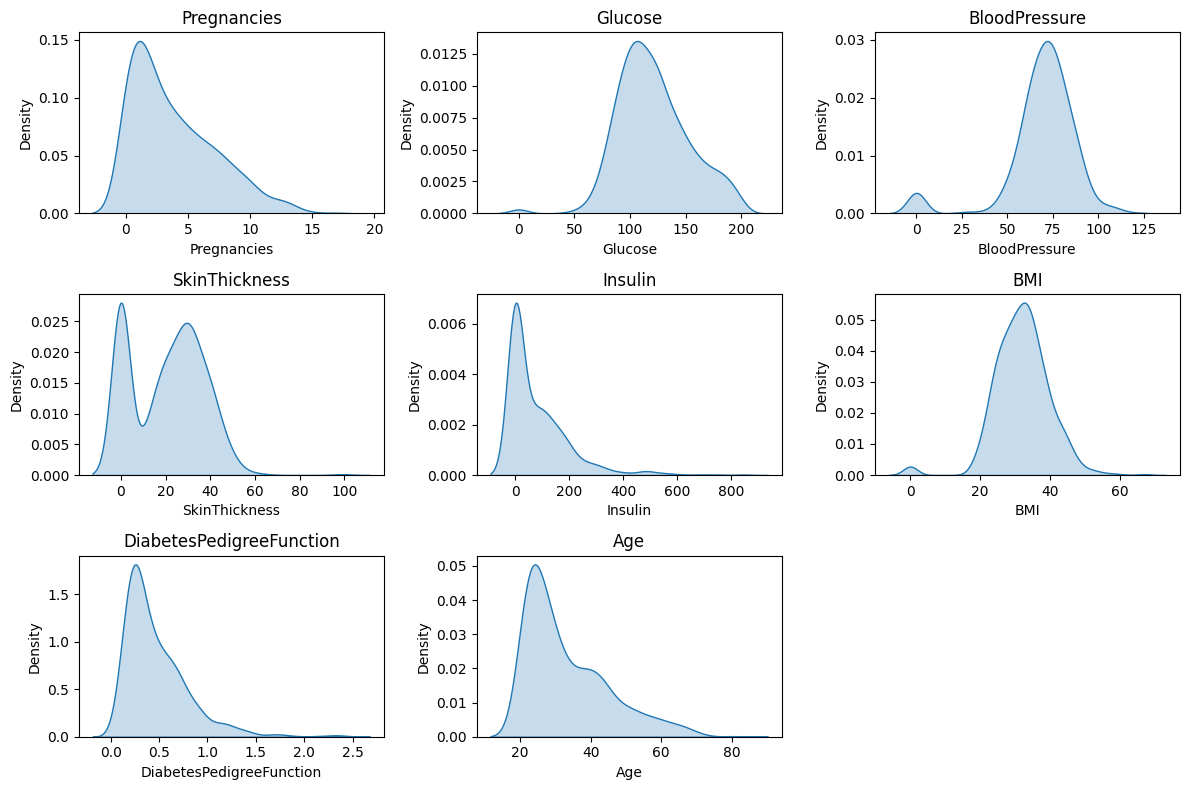

In [117]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.drop(columns=["Outcome"]).columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Osservazioni sulle distribuzioni:
  1.   Pregnancies:
    - distribuzione **asimmetrica verso destra**.
    - la maggior parte dei valori è concentrata vicino a `0-5` gravidanze.
    - ci sono alcune persone con molte gravidanze `(>10)`, che possono essere considerate **outlier**.

  2.   Glucose:
    - distribuzione quasi normale, ma **leggermente spostata verso destra**.
    - alcuni valori sono estremamente alti `(>200)`, che potrebbero indicare pazienti con **problemi gravi di diabete** o **potenziali outlier**.

  3.   BloodPressure:
      - distribuzione centrata intorno a `70-80 mm Hg`, con una **forma simmetrica**.
      -**non ci sono** valori estremamente bassi o alti che sembrano problematici.

  4.   SkinThickness:
    - distribuzione **asimmetrica** con un **picco** intorno a `20 mm`.
    - **non ci sono** valori estremamente bassi o alti che sembrano problematici.

  5.   Insulin:
    - distribuzione **molto asimmetrica** con un **picco** vicino a `0`.
    - **molti valori a 0** suggeriscono **valori mancanti** o **non registrati**.

  6.   BMI:
    - distribuzione **asimmetrica verso destra**.
    - alcuni valori estremamente alti `(>50)` potrebbero rappresentare **outlier** o pazienti con **obesità estrema**.

  7.   DiabetesPedigreeFunction:
    - distribuzione **altamente asimmetrica** con un **picco** intorno a `0.2-0.4`.
    - alcuni valori molto alti **(>1.5)** sono **rari** e potrebbero essere considerati **outlier**.

  8.   Age:
    - distribuzione **asimmetrica** con la maggior parte dei pazienti concentrati `tra 20 e 40 anni`.
    - un numero ridotto di pazienti è più anziano `(>60 anni)`, ma ciò è previsto in un dataset sulla salute.

Cosa indicano questi grafici:
  1. Valori mancanti:
    - alcune colonne (es. SkinThickness e Insulin) mostrano una **forte concentrazione di valori a 0**, che potrebbero rappresentare **dati non registrati**.
  2. Outlier:
    - alcune colonne (es. Pregnancies, Glucose, BMI) presentano **valori estremi** che potrebbero essere **outlier**. Questi dovrebbero essere gestiti attentamente tramite rimozione o trasformazioni logaritmiche.
  3. Distribuzioni asimmetriche:
    - alcuni variabili (es. DiabetesPedigreeFunction e Insulin) hanno **distribuzioni molto asimmetriche**. Questo potrebbe richiedere trasformazioni logaritmiche o power transformations.
  4. Distribuzioni normali:
    - alcuni variabili (es. BloodPressure e Glucose) sono più **vicine a una distribuzione normale**, quindi sono meno problematiche per la modellazione.  


Questo pezzo di codice visualizza una matrice di correlazione tra le feature numeriche nel dataset, rappresentata visivamente come una heatmap:
- ogni cella rappresenta la correlazione tra due variabili.
- colori diversi indicano l'intensità della correlazione. \

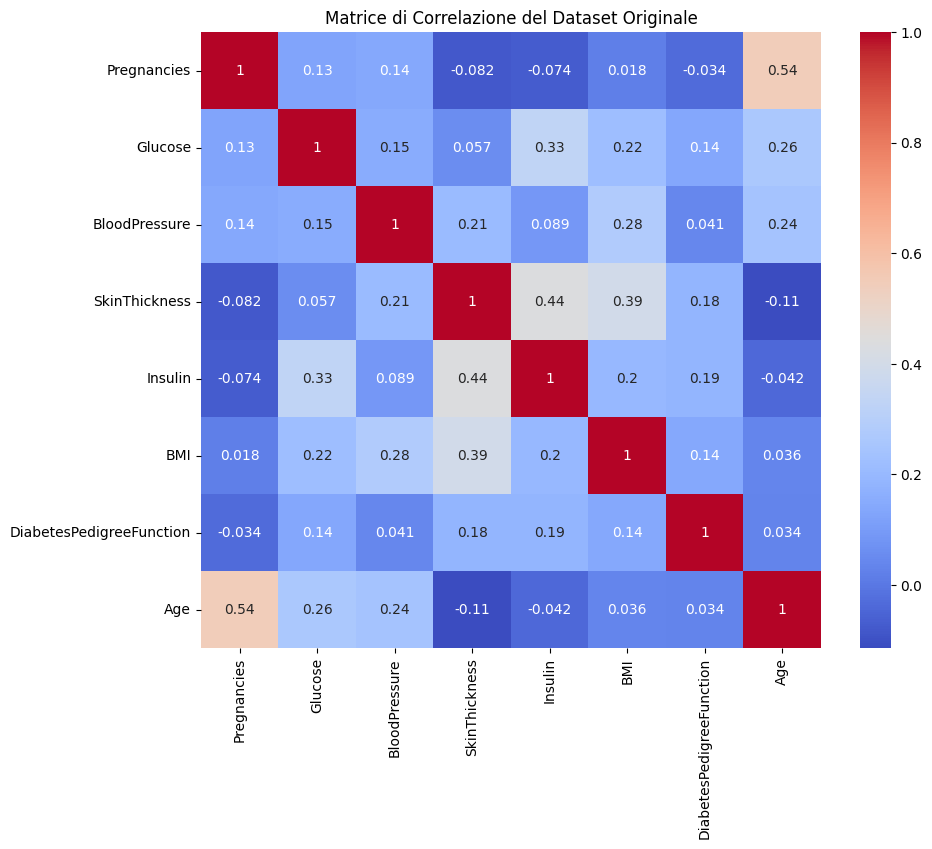

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=["Outcome"]).corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione del Dataset Originale')
plt.show()

Osservazioni generali:
1. Colore e valore della correlazione:
  - **blu scuro** indica correlazioni **deboli** o **negative**.
  - **rosso** più intenso indica correlazioni **forti** e **positive**.
  - valori **vicini a 1 o -1** indicano una correlazione **forte**.
  - valori **vicini a 0** indicano una correlazione **debole** o **assente**.

2. La diagonale principale (valore 1):
  - rappresenta la correlazione di ogni variabile **con se stessa** (sempre 1).

Analisi delle relazioni principali:
1. Correlazioni alte (moderate o significative):
  - Pregnancies e Age (0.54):
    - una correlazione positiva moderata.
    - è ragionevole perché l'età avanzata è associata a un numero maggiore di gravidanze.

  - SkinThickness e Insulin (0.44):
    - questa correlazione positiva potrebbe indicare che i livelli di insulina influenzano lo spessore del tessuto cutaneo o viceversa.

  - BMI e SkinThickness (0.39):
    - una correlazione positiva moderata che potrebbe suggerire che un indice di massa corporea più elevato sia associato a un maggiore spessore della pelle.

  - Glucose e Insulin (0.33):
    - una correlazione positiva che suggerisce una possibile relazione tra livelli di glucosio e insulina nel sangue.

2. Correlazioni moderate:
  - BMI e BloodPressure (0.28):
    - una correlazione positiva moderata
    - è plausibile, poiché l'indice di massa corporea più elevato può influenzare la pressione sanguigna.

  - Age e Glucose (0.26):
    - suggerisce che i livelli di glucosio tendono a essere più alti con l'età.

  - BloodPressure e Age (0.24):
    - una correlazione moderata, che potrebbe riflettere un aumento della pressione arteriosa con l'avanzare dell'età.

3. Correlazioni deboli o negative:
  - SkinThickness e Age (-0.11):
    - una correlazione negativa debole, suggerendo che lo spessore cutaneo non aumenta necessariamente con l'età.

  - Pregnancies e altre variabili (valori bassi, vicini a 0):
    - le gravidanze non sembrano essere fortemente correlate con altre caratteristiche (eccetto l'età).

  - DiabetesPedigreeFunction e altre variabili (valori bassi):
    - questa variabile, che rappresenta una funzione genetica, non sembra avere una relazione lineare forte con altre caratteristiche.

Conclusioni:
- Le variabili **Pregnancies, Age, BMI e Glucose** mostrano alcune correlazioni significative con altre feature, indicando che potrebbero avere un ruolo importante nella previsione del diabete.

- La correlazione tra **SkinThickness e Insulin** merita particolare attenzione, poiché suggerisce una relazione potenziale che potrebbe essere importante per l'analisi.

- Variabili come **DiabetesPedigreeFunction** mostrano deboli correlazioni, suggerendo che la loro influenza potrebbe essere indipendente o non lineare.

Passi successivi:

- Feature Engineering:
  - variabili con correlazioni moderate o deboli potrebbero essere trasformate o combinate per creare nuove feature.


---
---

### **Preprocessing del dataset**

#### **Gestione dei valori mancanti**
  - `columns_to_fix` ontiene un elenco di colonne ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') dove il valore 0 è considerato un errore o dato mancante.
  - `replace(0, np.nan)` sostituisce tutti i valori 0 con NaN (not a number) nelle colonne specificate.  
  - questo passo **è necessario** perché **un valore 0 non è realistico** in queste variabili (es. pressione sanguigna, glucosio, ecc.).
  - `df.isnull().sum()` conta i valori NaN in ogni colonna, permettendo di verificare quante celle risultano ora vuote dopo la sostituzione.
  - **output atteso** stampa il numero di valori nulli presenti nelle colonne dopo la sostituzione dei valori 0.

In [119]:
# Gestione valori mancanti: sostituisco 0 con NaN per le feature critiche
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

print("Valori nulli dopo aver sostituito 0 con NaN:")
print(df.isnull().sum())

# Contare le righe con almeno un valore mancante nelle colonne critiche
num_righe_con_null = df[columns_to_fix].isnull().any(axis=1).sum()

print(f"Numero totale di righe con almeno un valore mancante: {num_righe_con_null}")

Valori nulli dopo aver sostituito 0 con NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Numero totale di righe con almeno un valore mancante: 376


Questo pezzo di codice si occupa dell'imputazione dei valori mancanti (NaN) utilizzando un metodo avanzato, `IterativeImputer`, e verifica che tutti i valori mancanti siano stati gestiti.
  - IterativeImputer:
    - si tratta di un'imputazione avanzata in cui i valori mancanti vengono stimati in base ai valori delle altre feature nel dataset.
    - l'imputer utilizza un algoritmo iterativo per stimare i valori mancanti di ciascuna feature come una funzione lineare delle altre feature.
    - parametri utilizzati sono `max_iter=10` (specifica il numero massimo di iterazioni per stimare i valori) e `random_state=42` (garantisce la riproducibilità dei risultati).

  - Imputazione dei valori mancanti:
    - `fit_transform()` calcola i valori stimati per i NaN in base alle altre feature e li sostituisce nei dati originali.
    - i valori mancanti nelle colonne specificate in `columns_to_fix` vengono quindi riempiti con i valori stimati.

  - Controllo post-imputazione:
    - `df.isnull().sum()` conta i valori mancanti in ogni colonna dopo l'imputazione per assicurarsi che tutte le celle siano state correttamente riempite.
    - **output atteso** stampa del conteggio dei valori nulli dopo l'imputazione (sovrebbe risultare 0 valori nulli per tutte le colonne in columns_to_fix, indicando che tutti i valori mancanti sono stati sostituiti con stime).

In [120]:
# Imputazione con IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)
df[columns_to_fix] = imputer.fit_transform(df[columns_to_fix])

# Controllo post-imputazione
print("Valori nulli dopo IterativeImputer:")
print(df.isnull().sum())

Valori nulli dopo IterativeImputer:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### **Gestione degli outlier**

 Questo pezzo di codice applica un PowerTransformer per trasformare le variabili asimmetriche (con distribuzioni non normali) in distribuzioni più vicine a una normale (gaussiane). Questo passaggio è utile per migliorare le prestazioni di molti algoritmi di machine learning che assumono dati con distribuzioni normali.

 Tuttavia, prima di applicare la trasformazione, mettiamo un'esempio delle distribuzioni delle variabili Insulin e DiabetesPedigreeFunction che mostrano una forte asimmetria:
 - Insulin:
    - distribuzione con un picco molto elevato vicino allo zero, suggerendo una concentrazione di valori bassi o mancanti.
 - DiabetesPedigreeFunction:
    - distribuzione asimmetrica con una coda lunga verso valori più alti.

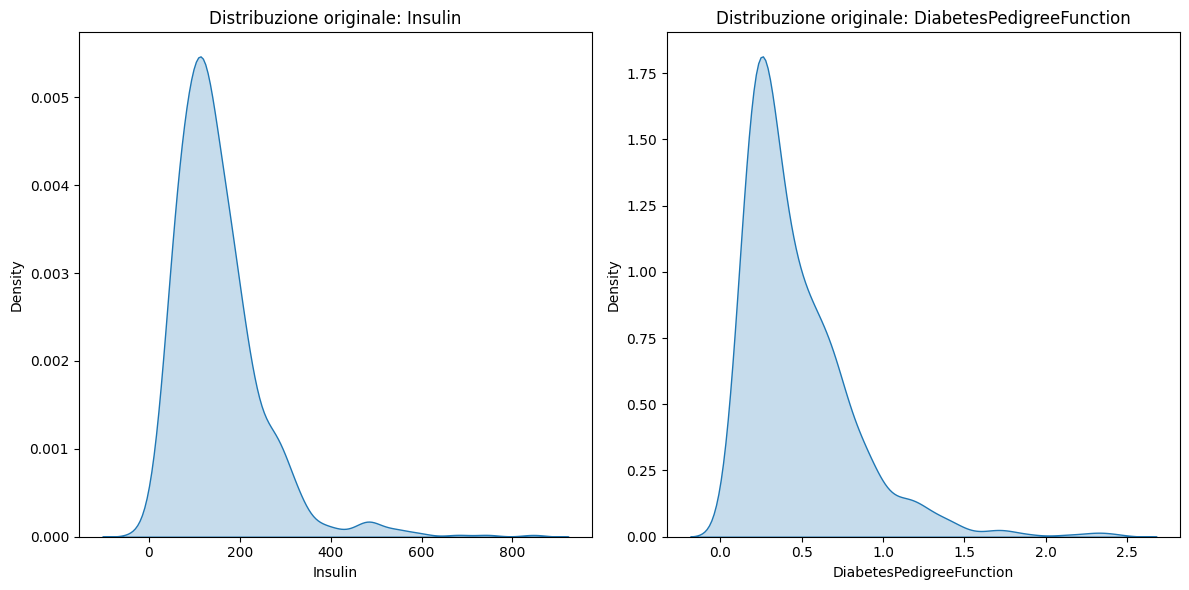

In [121]:
# Visualizzazione delle distribuzioni originali (prima della trasformazione)
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribuzione originale: {col}")
plt.tight_layout()
plt.show()

Adesso applichiamo la trasformazione:
  - `PowerTransformer()`:
    - è uno strumento di preprocessing di scikit-learn che applica trasformazioni non lineari.
    - serve per stabilizzare la varianza, rendere la distribuzione dei dati più simmetrica, migliorare le prestazioni degli algoritmi sensibili alla distribuzione dei dati, come la regressione lineare o i modelli basati su distanza (es. SVM).
  - `fit_transform()`:
    - calcola i parametri della trasformazione in base ai dati forniti, poi applica la trasformazione ai dati.
    - di default utilizza il metodo Yeo-Johnson, che supporta dati sia positivi che negativi (al contrario del Box-Cox che funziona solo con valori positivi).

In [36]:
# Applicazione di PowerTransformer per variabili asimmetriche
power_transformer = PowerTransformer()
df[['Insulin', 'DiabetesPedigreeFunction']] = power_transformer.fit_transform(df[['Insulin', 'DiabetesPedigreeFunction']])

Infatti, dopo l'applicazione del `PowerTransformer` si vede che la distribuzione si è stabilizzata:
- Insulin:
    - la distribuzione si avvicina a una forma simmetrica e centrata, migliorando la normalità.
- DiabetesPedigreeFunction:
    - anche questa distribuzione diventa più simmetrica e più vicina a una distribuzione normale.


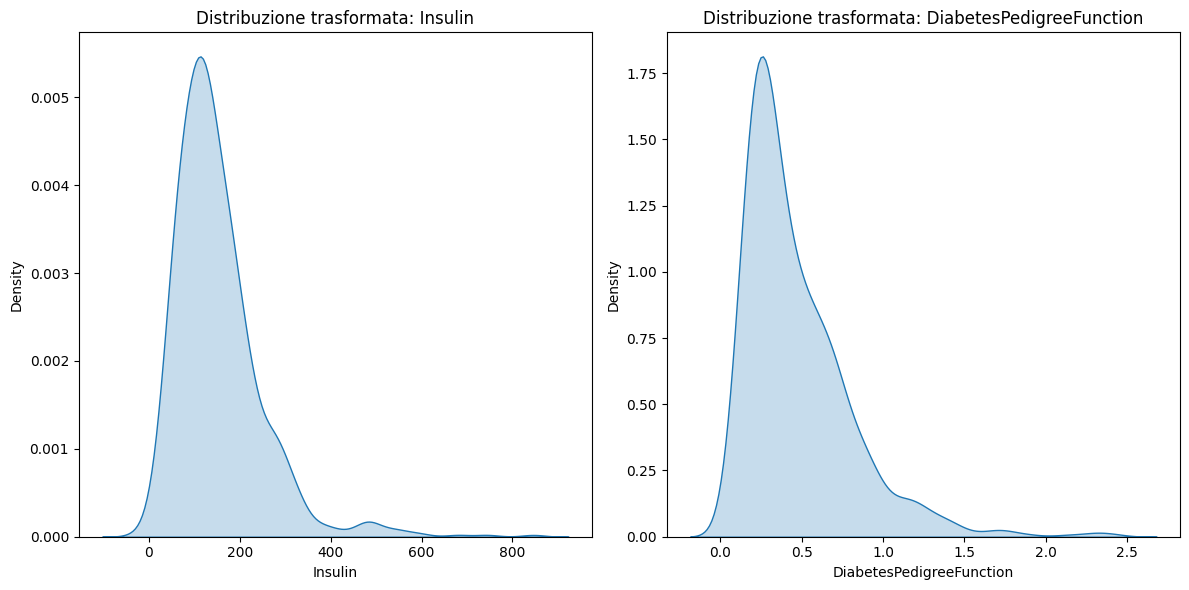

In [122]:
# Visualizzazione delle distribuzioni trasformate (dopo PowerTransformer)
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribuzione trasformata: {col}")
plt.tight_layout()
plt.show()

Questa trasformazione implica:
1. Rimozione dell'asimmetria:
  - algoritmi come la regressione lineare, le reti neurali o i modelli basati su distanze funzionano meglio con dati normalizzati.

2. Stabilità numerica:
  - valori estremi vengono ridotti, diminuendo il rischio di influenze sproporzionate da outlier.

3. Miglioramento dell'accuratezza del modello:
  - molti modelli producono risultati più stabili e interpretabili con dati normalizzati.

#### **Feature Engineering (da capire se mettere oppure no  -> mi sa di no)**

Questo pezzo di codice crea nuove feature basate su combinazioni o interazioni tra variabili già esistenti nel dataset. Queste nuove feature possono catturare relazioni più complesse tra variabili che i modelli di machine learning potrebbero altrimenti non individuare facilmente.

In [123]:
# Creazione di nuove feature
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] / (df['Age'] + 1)

- BMI_Age:
  - combina l'indice di massa corporea (BMI) con l'età del paziente.
  - pazienti con BMI elevato e maggiore età potrebbero avere un rischio più alto di sviluppare malattie legate al metabolismo, come il diabete.

- Glucose_BMI:
  - combina ombina il livello di glucosio nel sangue con l'indice di massa corporea.
  - un elevato valore di questa feature potrebbe indicare pazienti con obesità e alti livelli di glucosio, un possibile segnale di insulino-resistenza.

- Glucose_Age:
  - relaziona il livello di glucosio con l'età del paziente, dividendo il glucosio per l'età +1 (per evitare divisioni per zero nel caso in cui l'età fosse 0).
  - mostra come i livelli di glucosio cambiano in relazione all'età, dove valori elevati potrebbero indicare livelli di glucosio insolitamente alti rispetto all'età del paziente.

Questo pezzo di codice visualizza le distribuzioni originali delle feature del dataset.

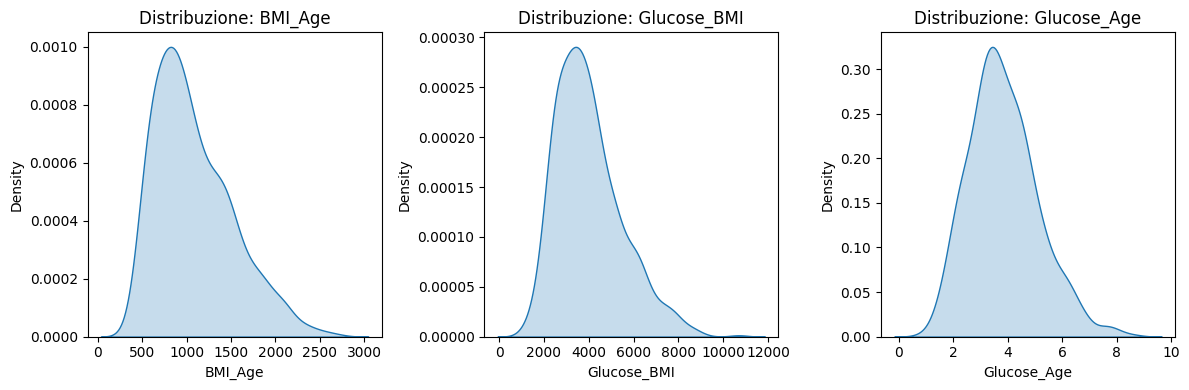

In [124]:
# Selezioniamo solo le nuove feature
new_features = ['BMI_Age', 'Glucose_BMI', 'Glucose_Age']
X_new = df[new_features]

# Impostiamo i subplot per 3 colonne (1 riga)
plt.figure(figsize=(12, 4))  # Regoliamo la dimensione della figura
n_cols = len(new_features)  # Numero di colonne (3)
n_rows = 1  # Una sola riga

# Visualizziamo le distribuzioni delle nuove feature
for i, col in enumerate(new_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_new, x=col, fill=True)
    plt.title(f"Distribuzione: {col}")

plt.tight_layout()
plt.show()


#### **Standardizzazione delle feature**

  Questo pezzo di codice esegue la standardizzazione delle feature, un passaggio fondamentale del preprocessing per i modelli di machine learning.
  Tuttavia, prima di applicare la standardizzazione, mettiamo un'esempio delle distribuzioni attuali:


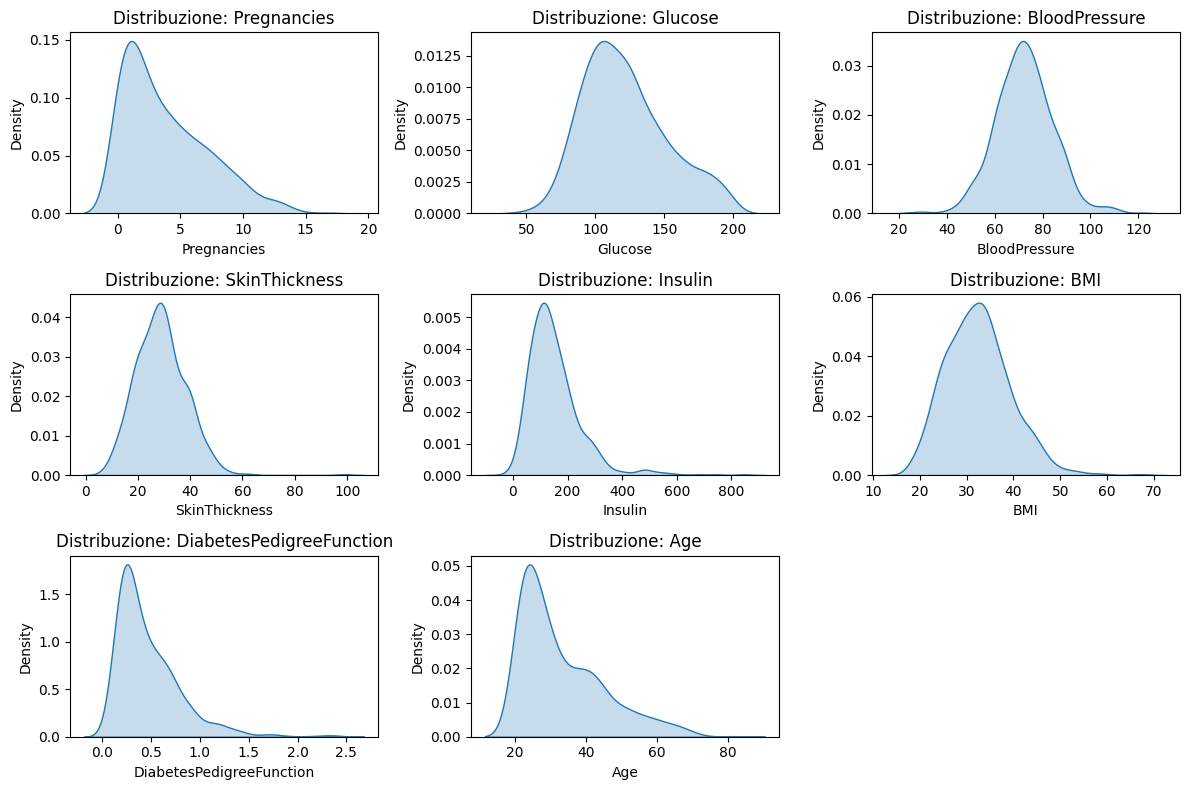

In [125]:
# Definiamo le feature originali escludendo le tre nuove
excluded_features = ['BMI_Age', 'Glucose_BMI', 'Glucose_Age']
X_filtered = df.drop(columns=excluded_features + ["Outcome"])  # Escludiamo anche il target se presente

# Calcolo dinamico delle righe necessarie
n_cols = 3  # Numero di colonne nei subplot
n_rows = int(np.ceil(len(X_filtered.columns) / n_cols))  # Calcola il numero di righe necessarie

# Visualizzazione delle distribuzioni senza le nuove feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_filtered.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_filtered, x=col, fill=True)
    plt.title(f"Distribuzione: {col}")

plt.tight_layout()
plt.show()


Adesso applichiamo la standardizzazione e vediamo cosa succede nel dettaglio:
  - `StandardScaler` trasforma i dati in modo che ogni feature abbia **media 0** e **deviazione standard 1**.
  - `X = df.drop(columns=["Outcome"])` esclude la variabile target (Outcome) dal dataset, poiché questa non deve essere standardizzata (è il valore da prevedere, non da trasformare).
  - `fit_transform(X)` calcola la media e la deviazione standard di ciascuna colonna nel dataset X, poi utilizza questi parametri per trasformare ogni valore di ciascuna feature secondo la formula della standardizzazione.
  - output atteso è un array numpy in cui tutte le feature sono standardizzate (media 0 e deviazione standard 1).

E' importante standardizzare le feature, perchè le feature nel dataset spesso hanno scale diverse (es. Glucose varia da 50 a 200, mentre Age varia da 20 a 80). Standardizzare elimina il problema delle scale diverse.
  
Tra altro, esistono anche modelli sensibili alla scala, come SVM, k-NN, regressione logistica, reti neurali e ecc. Questi algoritmi calcolano distanze o ottimizzano con gradienti e richiedono che le feature abbiano valori comparabili.

In [126]:
# Creiamo il dataset con tutte le feature (originali + nuove), escludendo il target
X = df.drop(columns=["Outcome"])

# Standardizzazione di tutte le feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dopo aver applicato la standardizzazione con StandardScaler, che centra i dati a una media di 0 e una deviazione standard di 1, il codice visualizza le distribuzioni delle feature standardizzate.

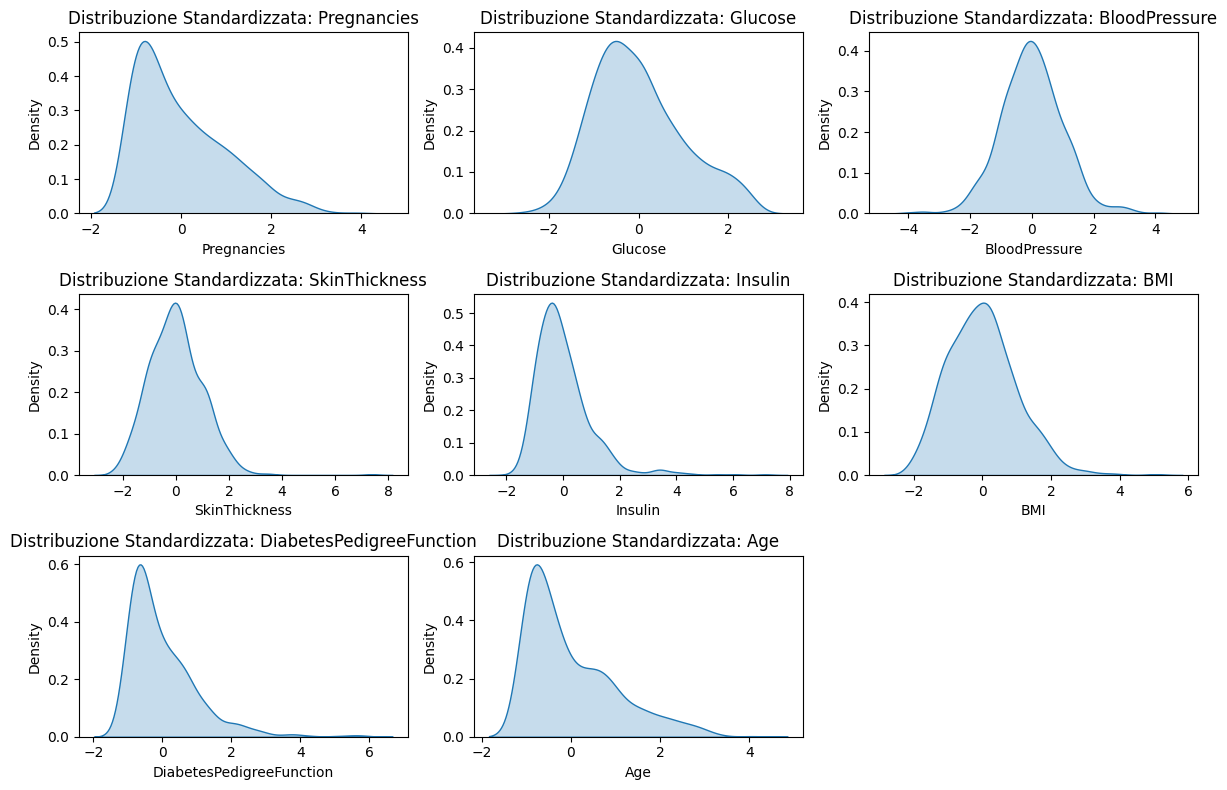

In [127]:
# Definiamo le feature originali escludendo le tre nuove
excluded_features = ['BMI_Age', 'Glucose_BMI', 'Glucose_Age']
original_features = [col for col in X.columns if col not in excluded_features]

# Creiamo un nuovo DataFrame standardizzato solo con le feature originali
X_scaled_df_filtered = pd.DataFrame(X_scaled, columns=X.columns)[original_features]

# Calcolo dinamico delle righe necessarie per la visualizzazione
n_cols = 3  # Numero di colonne nei subplot
n_rows = int(np.ceil(len(original_features) / n_cols))  # Calcola il numero di righe necessarie

# Visualizzazione delle distribuzioni standardizzate senza le nuove feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(original_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_scaled_df_filtered, x=col, fill=True)
    plt.title(f"Distribuzione Standardizzata: {col}")

plt.tight_layout()
plt.show()


Dai grafici si vede come le distribuzioni siano state ridimensionate e centrate, garantendo che tutte le variabili siano sulla stessa scala, essenziale per il corretto funzionamento di molti algoritmi di machine learning.

#### **Bilanciamento del dataset con SMOTE**
- è una tecnica utilizzata per bilanciare i dataset sbilanciati.
- genera campioni sintetici per la classe minoritaria (in questo caso, Outcome=1, ovvero i pazienti diabetici) anziché duplicare semplicemente i dati esistenti.
- questo approccio aiuta a evitare problemi di overfitting che possono verificarsi quando si duplicano i dati reali.

In [128]:
# Creiamo un DataFrame standardizzato con tutte le feature
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Creazione del target y
y = df["Outcome"]

# Controlliamo che X_scaled_df_filtered e y abbiano le stesse dimensioni
print(f"Dimensioni di X_scaled_df_filtered: {X_scaled_df_filtered.shape}")
print(f"Dimensioni di y: {y.shape}")

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df_filtered, y)
# Applicazione di SMOTE per bilanciare il dataset con le feature (nel futuro da eliminare)
X_resampled_prova, y_resampled_prova = smote.fit_resample(X_scaled_df, y)

# Controlliamo la nuova distribuzione delle classi dopo SMOTE
print("Distribuzione delle classi dopo SMOTE:")
print(y_resampled.value_counts())

Dimensioni di X_scaled_df_filtered: (768, 8)
Dimensioni di y: (768,)
Distribuzione delle classi dopo SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


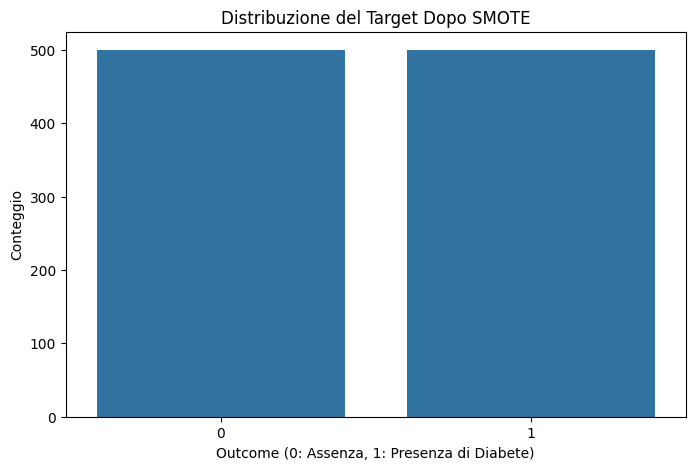

In [129]:
# Visualizzazione della distribuzione del target dopo SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled)
plt.title('Distribuzione del Target Dopo SMOTE')
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")
plt.show()

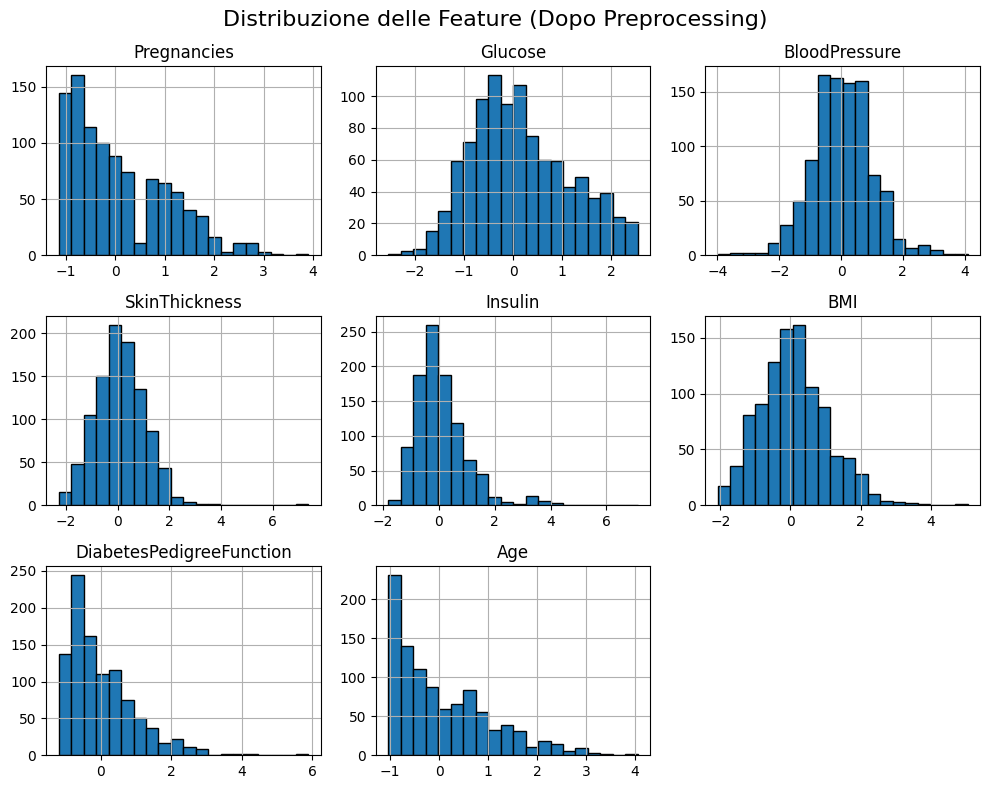

In [130]:
# Definiamo le feature originali escludendo le nuove
original_features = [col for col in X.columns if col not in ['BMI_Age', 'Glucose_BMI', 'Glucose_Age']]

# Creiamo un DataFrame con solo le feature originali dopo SMOTE
X_resampled_original = pd.DataFrame(X_resampled, columns=X.columns)[original_features]

# Istogrammi delle feature originali dopo SMOTE e standardizzazione
X_resampled_original.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature (Dopo Preprocessing)', fontsize=16)
plt.tight_layout()
plt.show()


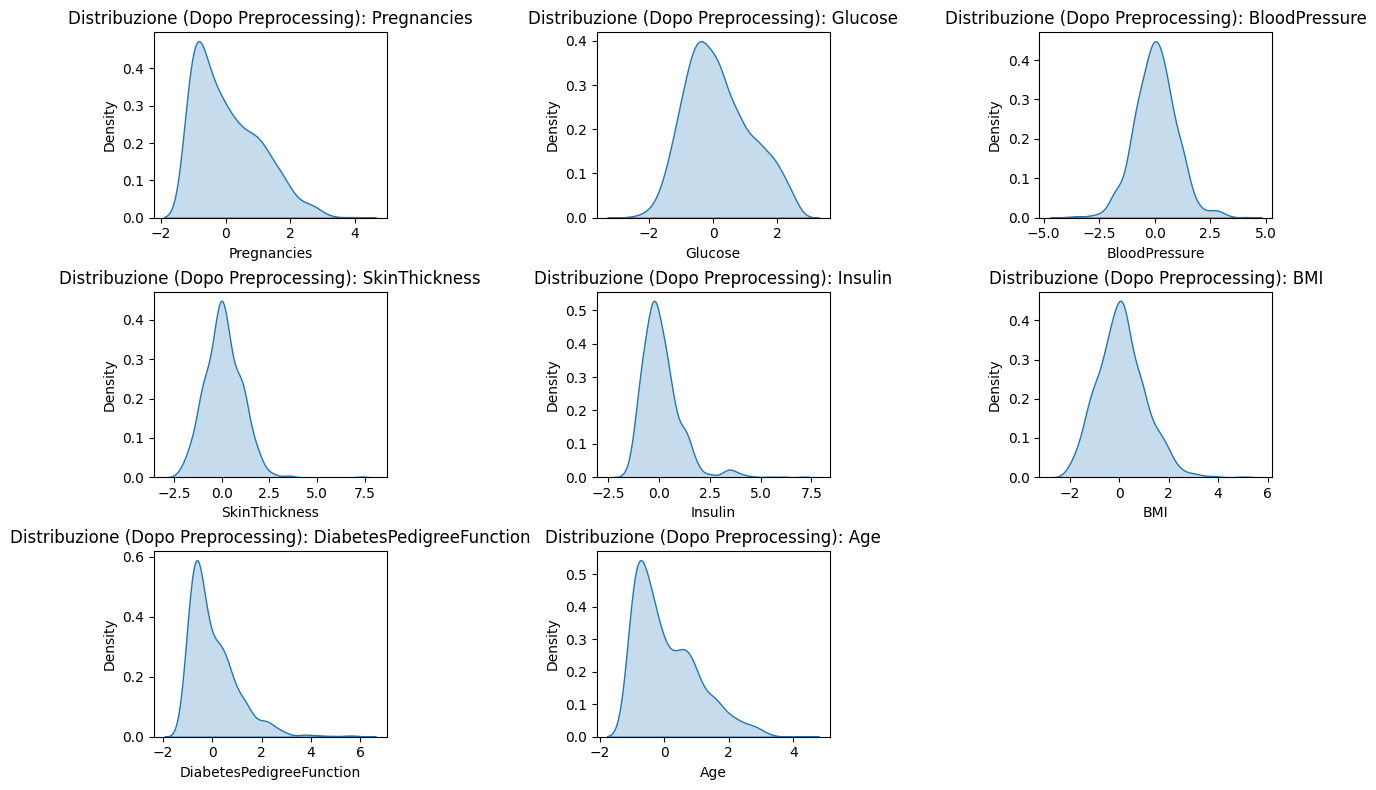

In [131]:
# KDE per il dataset con solo le feature originali dopo SMOTE con più spazio tra i grafici
plt.figure(figsize=(12, 8))

for i, col in enumerate(original_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_resampled_original, x=col, fill=True)
    plt.title(f"Distribuzione (Dopo Preprocessing): {col}")

# Aggiungiamo più spazio tra i grafici
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.9)  # hspace: spazio verticale, wspace: spazio orizzontale

plt.show()


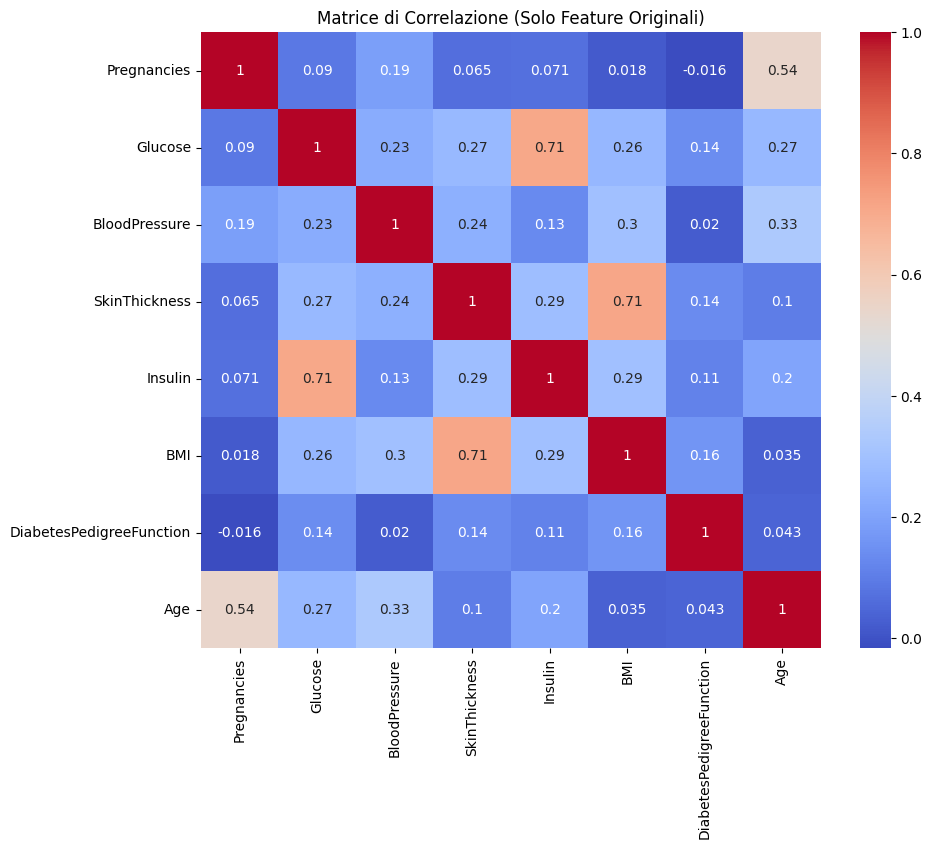

In [132]:
# Matrice di correlazione solo con le feature originali
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled_original.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione (Solo Feature Originali)')
plt.show()

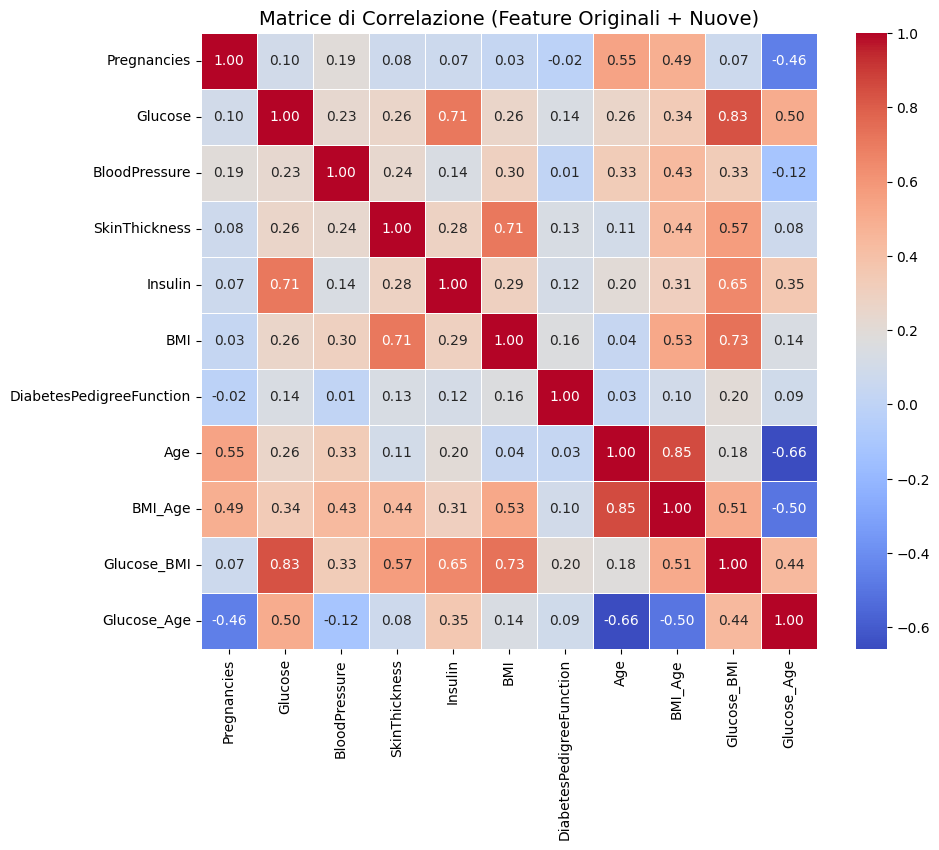

In [133]:
# Matrice di correlazione con tutte le feature (originali + nuove) (nel futuro da togliere)
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled_prova.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Titolo del grafico
plt.title('Matrice di Correlazione (Feature Originali + Nuove)', fontsize=14)

plt.show()


---
---

### **Modelli di classificazione**

#### **Divisione del dataset in Training e Test Set**

Una volta finita la fase di preprocessing, è necessario dividere i dati in **training set** e **test set** per addestrare e valutare i modelli di Machine Learning.

Utilizziamo la funzione `train_test_split()` di **scikit-learn** per suddividere il dataset in due diverse proporzioni:
- 70% Training – 30% Test:
  - Questo set viene usato per addestrare il modello con una quantità maggiore di dati, mantenendo comunque una porzione significativa per il test.
- 80% Training – 20% Test:
  - In questo caso, il modello viene addestrato con ancora più dati, lasciando meno spazio alla valutazione. Questo può essere utile quando si vuole massimizzare l'apprendimento del modello.

In [134]:
# Divisione Training e Test set (70% Training, 30% Test)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Dimensioni dei dataset dopo SMOTE:")
print(f"Train Set 1: {x_train.shape}, Test Set: {x_test.shape}")

# Divisione Training e Test set (80% Training, 20% Test)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Dimensioni dei dataset dopo SMOTE:")
print(f"Train Set 2: {x_train2.shape}, Test Set: {x_test2.shape}")

Dimensioni dei dataset dopo SMOTE:
Train Set 1: (700, 8), Test Set: (300, 8)
Dimensioni dei dataset dopo SMOTE:
Train Set 2: (800, 8), Test Set: (200, 8)


#### **Decision Tree Classifier**


In [135]:
# Decision Tree Classifier 1
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Decision Tree Classifier 2
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(x_train2, y_train2)
y_pred_dt2 = dt_model2.predict(x_test2)

In [136]:
# Decision Tree Evaluation 1
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)


# Decision Tree Evaluation 2
accuracy_dt2 = accuracy_score(y_test2, y_pred_dt2)
precision_dt2 = precision_score(y_test2, y_pred_dt2)
recall_dt2 = recall_score(y_test2, y_pred_dt2)
f1_dt2 = f1_score(y_test2, y_pred_dt2)
cm_dt2 = confusion_matrix(y_test2, y_pred_dt2)

Decision Tree Classifier 1:
 Accuracy: 0.72
 Precision: 0.7189542483660131
 Recall: 0.7284768211920529
 F1 Score: 0.7236842105263158


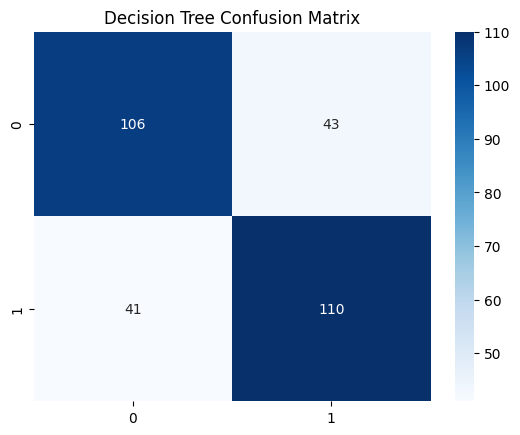

Decision Tree Classifier 2:
 Accuracy: 0.75
 Precision: 0.7339449541284404
 Recall: 0.7920792079207921
 F1 Score: 0.7619047619047619


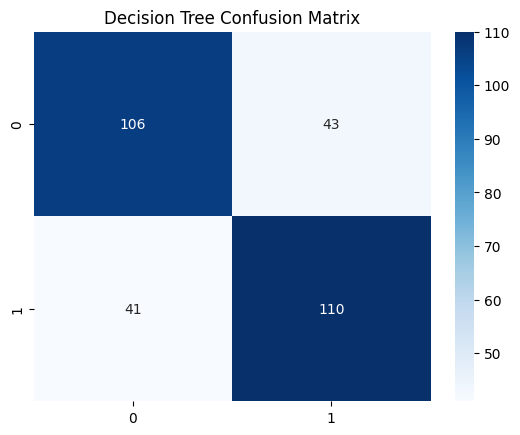

In [137]:
print(f'Decision Tree Classifier 1:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

print(f'Decision Tree Classifier 2:\n Accuracy: {accuracy_dt2}\n Precision: {precision_dt2}\n Recall: {recall_dt2}\n F1 Score: {f1_dt2}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

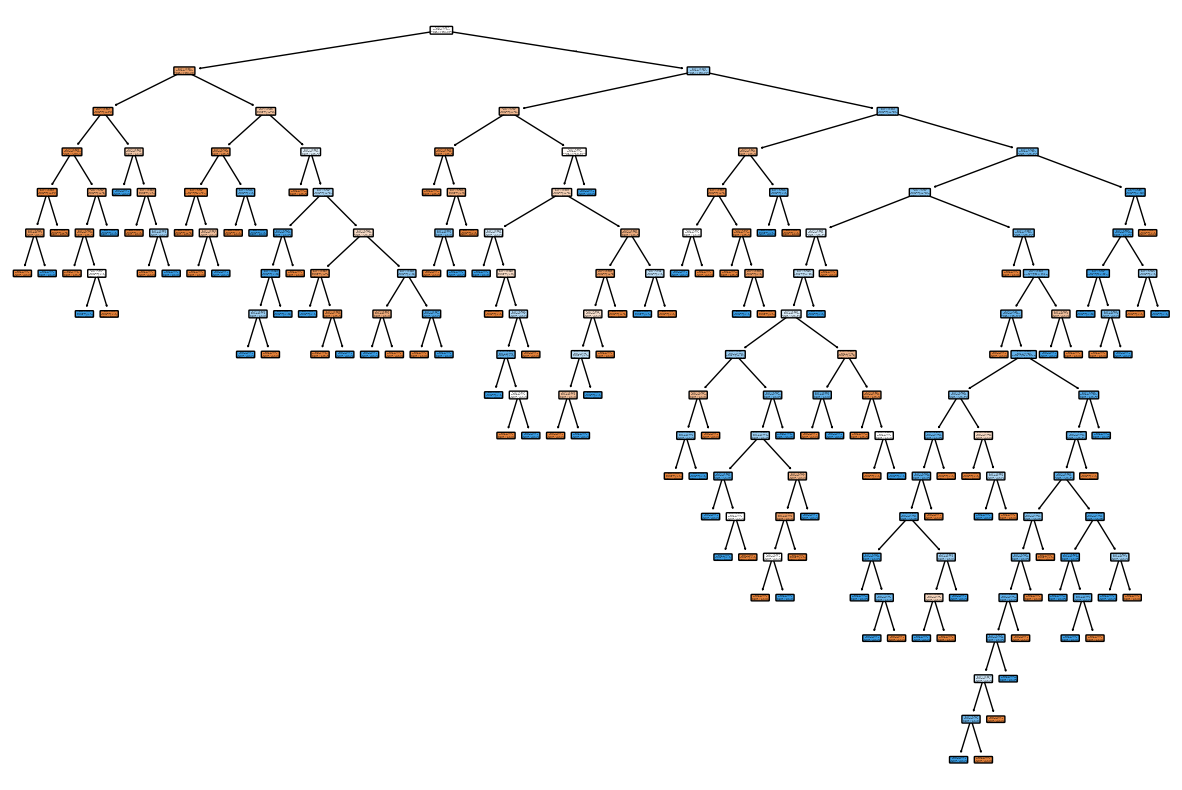

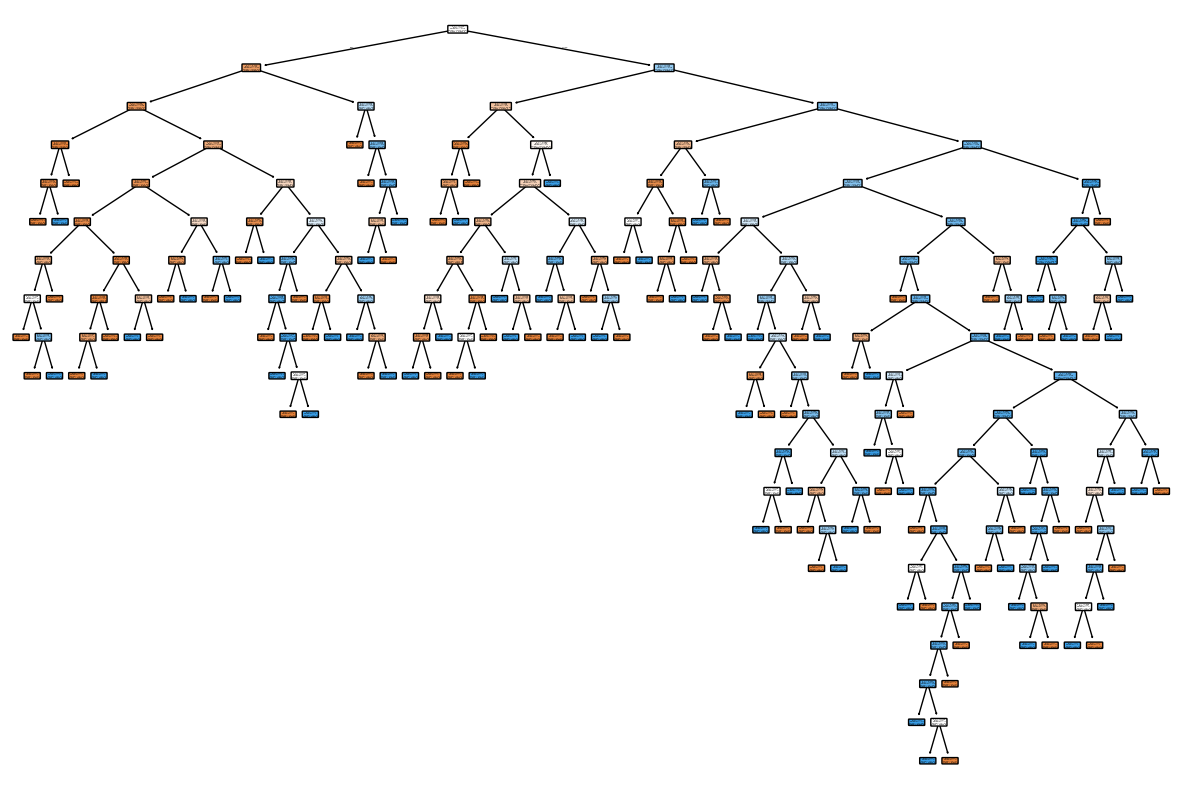

In [138]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

plt.figure(figsize=(15, 10))
plot_tree(dt_model2, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

#### Logistic Regression

In [139]:
# Logistic Regression 1
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Logistic Regression 1
lr_model2 = LogisticRegression(random_state=42)
lr_model2.fit(x_train2, y_train2)
y_pred_lr2 = lr_model2.predict(x_test2)

In [140]:
# Logistic regression Evaluation 1
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Logistic regression Evaluation 1
accuracy_lr2 = accuracy_score(y_test2, y_pred_lr2)
precision_lr2 = precision_score(y_test2, y_pred_lr2)
recall_lr2 = recall_score(y_test2, y_pred_lr2)
f1_lr2 = f1_score(y_test2, y_pred_lr2)
cm_lr2 = confusion_matrix(y_test2, y_pred_lr2)

Logistic Regression 1:
 Accuracy: 0.74
 Precision: 0.7517241379310344
 Recall: 0.7218543046357616
 F1 Score: 0.7364864864864865


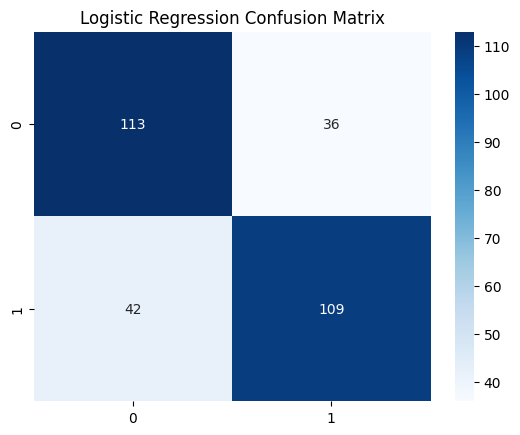

Logistic Regression 2:
 Accuracy: 0.76
 Precision: 0.7572815533980582
 Recall: 0.7722772277227723
 F1 Score: 0.7647058823529411


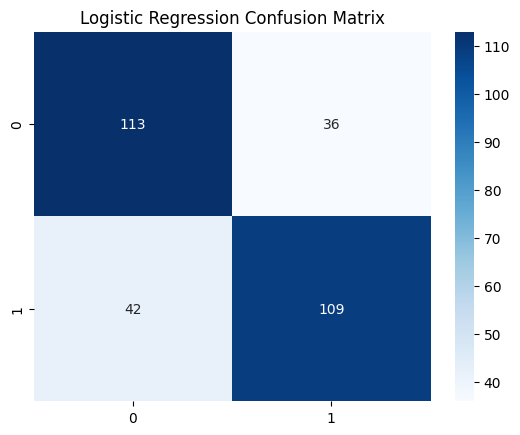

In [141]:
print(f'Logistic Regression 1:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print(f'Logistic Regression 2:\n Accuracy: {accuracy_lr2}\n Precision: {precision_lr2}\n Recall: {recall_lr2}\n F1 Score: {f1_lr2}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Support Vector Machine

In [142]:
# Support Vector Machine 1
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

# Support Vector Machine 2
svm_model2 = SVC(random_state=42)
svm_model2.fit(x_train2, y_train2)
y_pred_svm2 = svm_model2.predict(x_test2)

In [143]:
# SVM Evaluation 1
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# SVM Evaluation 2
accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
precision_svm2 = precision_score(y_test2, y_pred_svm2)
recall_svm2 = recall_score(y_test2, y_pred_svm2)
f1_svm2 = f1_score(y_test2, y_pred_svm2)
cm_svm2 = confusion_matrix(y_test2, y_pred_svm2)

Support Vector Machine 1:
 Accuracy: 0.79
 Precision: 0.7716049382716049
 Recall: 0.8278145695364238
 F1 Score: 0.7987220447284346


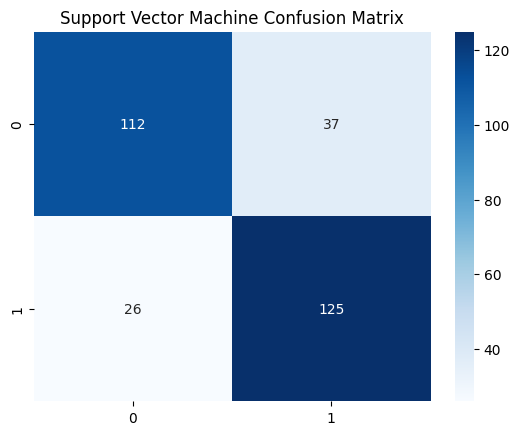

Support Vector Machine 2:
 Accuracy: 0.775
 Precision: 0.7413793103448276
 Recall: 0.8514851485148515
 F1 Score: 0.7926267281105991


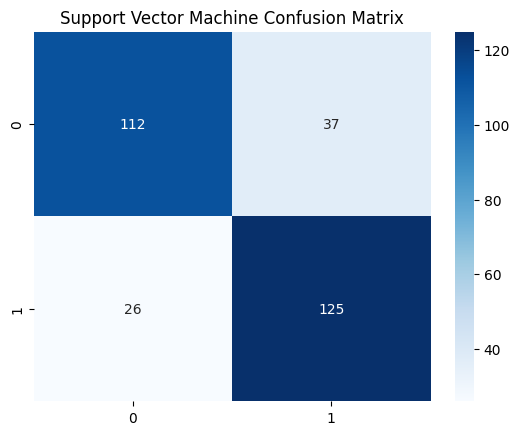

In [144]:
print(f'Support Vector Machine 1:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()


print(f'Support Vector Machine 2:\n Accuracy: {accuracy_svm2}\n Precision: {precision_svm2}\n Recall: {recall_svm2}\n F1 Score: {f1_svm2}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

#### Naive Bayes

In [145]:
# Naive Bayes 1
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

# Naive Bayes 2
nb_model2 = GaussianNB()
nb_model2.fit(x_train2, y_train2)
y_pred_nb2 = nb_model2.predict(x_test2)

In [146]:
# Naive Bayes Evaluation 1
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Naive Bayes Evaluation 2
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
precision_nb2 = precision_score(y_test2, y_pred_nb2)
recall_nb2 = recall_score(y_test2, y_pred_nb2)
f1_nb2 = f1_score(y_test2, y_pred_nb2)
cm_nb2 = confusion_matrix(y_test2, y_pred_nb2)

Naive Bayes 1:
 Accuracy: 0.7266666666666667
 Precision: 0.7633587786259542
 Recall: 0.6622516556291391
 F1 Score: 0.7092198581560284


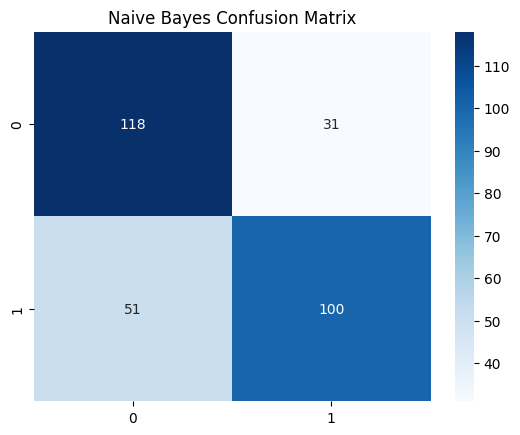

Naive Bayes 2:
 Accuracy: 0.74
 Precision: 0.7578947368421053
 Recall: 0.7128712871287128
 F1 Score: 0.7346938775510204


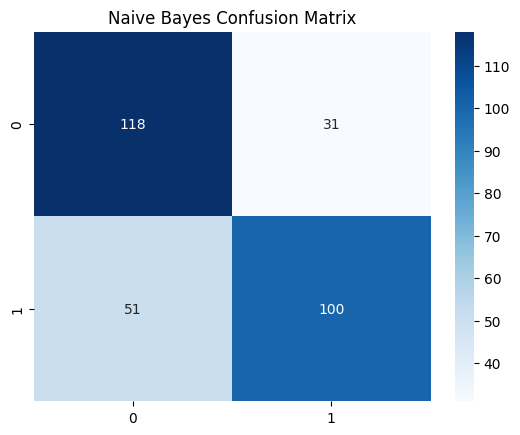

In [147]:
print(f'Naive Bayes 1:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print(f'Naive Bayes 2:\n Accuracy: {accuracy_nb2}\n Precision: {precision_nb2}\n Recall: {recall_nb2}\n F1 Score: {f1_nb2}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

#### Random Forest

In [148]:
# Random Forest 1
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Random Forest 2
rf_model2 = RandomForestClassifier(random_state=42)
rf_model2.fit(x_train2, y_train2)
y_pred_rf2 = rf_model2.predict(x_test2)

In [149]:
# Random Forest Evaluation 1
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Random Forest Evaluation 2
accuracy_rf2 = accuracy_score(y_test2, y_pred_rf2)
precision_rf2 = precision_score(y_test2, y_pred_rf2)
recall_rf2 = recall_score(y_test2, y_pred_rf2)
f1_rf2 = f1_score(y_test2, y_pred_rf2)
cm_rf2 = confusion_matrix(y_test2, y_pred_rf2)

Random Forest 1:
 Accuracy: 0.8066666666666666
 Precision: 0.7888198757763976
 Recall: 0.8410596026490066
 F1 Score: 0.8141025641025641


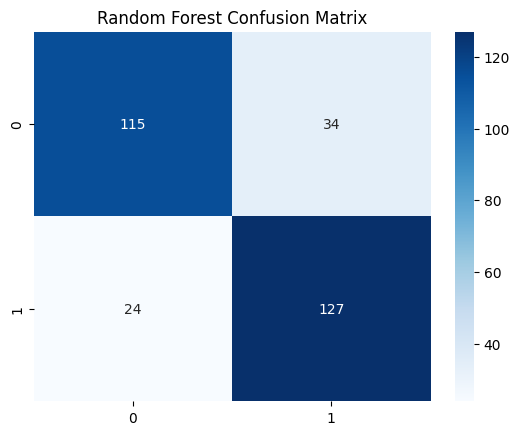

Random Forest 2:
 Accuracy: 0.81
 Precision: 0.7837837837837838
 Recall: 0.8613861386138614
 F1 Score: 0.8207547169811321


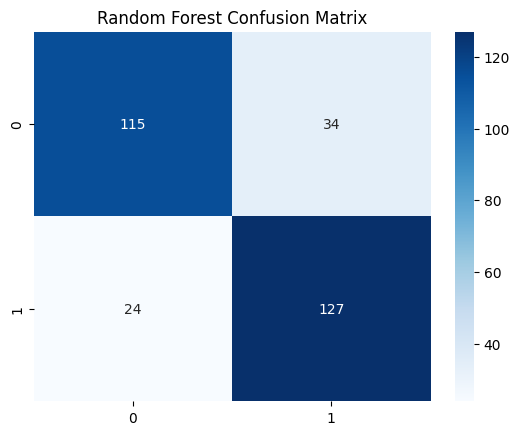

In [150]:
print(f'Random Forest 1:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

print(f'Random Forest 2:\n Accuracy: {accuracy_rf2}\n Precision: {precision_rf2}\n Recall: {recall_rf2}\n F1 Score: {f1_rf2}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# Controllare i duplicati
duplicates = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicates}")

# Rimuovere eventuali duplicati
if duplicates > 0:
    df = df.drop_duplicates()


Numero di componenti principali selezionate: 8
Varianza spiegata da ciascuna componente: [0.36104934 0.24156772 0.1199531  0.08856904 0.06847161 0.05156278
 0.03325009 0.0292682 ]
Varianza cumulativa: [0.36104934 0.60261707 0.72257017 0.81113921 0.87961082 0.9311736
 0.96442369 0.99369189]


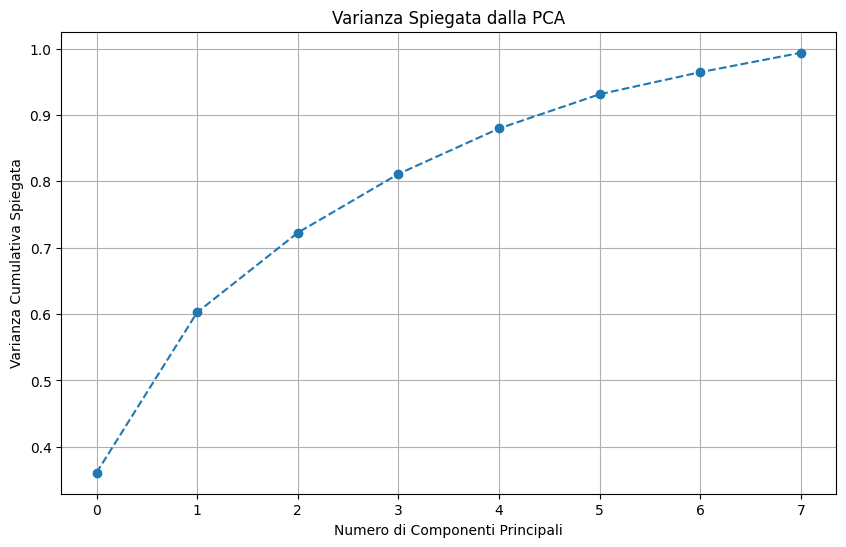

In [151]:

# NON USARE
# DANNEGGIA NOSTRO PROGETTO


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 3. Applicare PCA
# pca = PCA(n_components=0.99)  # Mantiene il 95% della varianza
# X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=len(X_resampled.columns))  # Mantiene tutte le componenti principali
X_pca = pca.fit_transform(X_scaled)

# 4. Controllare quante componenti principali sono state mantenute
print(f"Numero di componenti principali selezionate: {X_pca.shape[1]}")

# Mostra la varianza spiegata da ogni componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza spiegata da ciascuna componente: {explained_variance}")

# Mostra il numero di componenti necessarie per raggiungere il 95% della varianza
cumulative_variance = np.cumsum(explained_variance)
print(f"Varianza cumulativa: {cumulative_variance}")

# 5. Visualizzare la varianza spiegata da ogni componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Spiegata dalla PCA')
plt.grid()
plt.show()